In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("../features/data_colombia_completa_4.csv", sep=";")

In [5]:
data

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,...,NumberofhousesperKm2,promedio_tasa_dengue_mensual,promedio_tasa_dengue_mensual_x10000_habitantes,MSNM,density_year,cluster_id,tsne-1,tsne-2,pca-1,pca-2
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,...,2102.057895,0.000140,1.398562,1538,1288.0,0,-37.866295,8.555570,15.721096,15.737796
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,...,11.945674,0.000030,0.298171,2275,11.6,1,-4.856763,-24.657568,0.906629,-2.701093
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,...,2.548276,0.000017,0.169010,1900,1.3,1,-0.844723,-21.370985,0.830391,-2.343572
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,...,9.092715,0.000018,0.175392,1750,2.2,1,-11.417674,-14.156313,1.147555,-1.417851
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,...,102.752941,0.000158,1.582632,1250,15.8,1,-21.884594,-2.645213,2.510024,-0.557755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161239,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,...,0.028621,0.000011,0.111717,100,0.6,2,39.219950,20.287613,-6.071679,3.309701
161240,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,...,0.432426,0.000368,3.677812,51,11.8,2,18.126331,16.152170,-2.650676,2.115876
161241,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,...,0.113272,0.000251,2.512306,100,5.7,2,17.012686,15.717471,-3.434355,1.526886
161242,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,...,0.247904,0.000382,3.818935,125,2.3,2,16.845583,15.289146,-3.336722,1.393652


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161244 entries, 0 to 161243
Data columns (total 49 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Municipality code                               161244 non-null  int64  
 1   Municipality                                    161244 non-null  object 
 2   Date                                            161244 non-null  object 
 3   temperature                                     161244 non-null  float64
 4   month_str                                       161244 non-null  object 
 5   month                                           161244 non-null  int64  
 6   year                                            161244 non-null  int64  
 7   concat_code_year_month                          161244 non-null  object 
 8   precipitation                                   161244 non-null  float64
 9   cases                     

## Processing the target variable

In [25]:
# tasa_mean = data.tasa_dengue_mensual_x10000_habitantes.mean()
# tasa_std = data.tasa_dengue_mensual_x10000_habitantes.std()
# tasa_lim = tasa_mean + 2*tasa_std
# print(tasa_lim)
data.tasa_dengue_mensual_x10000_habitantes.describe()

9.367777307643344


count    161244.000000
mean          1.181395
std           4.093191
min           0.000000
25%           0.000000
50%           0.000000
75%           0.866745
max         583.941606
Name: tasa_dengue_mensual_x10000_habitantes, dtype: float64

In [45]:
tasa_lim = data.tasa_dengue_mensual_x10000_habitantes.quantile(0.9) # aproximatly this percentile
tasa_lim

3.218322204276291

In [46]:
data["high_risk"] = (data['promedio_tasa_dengue_mensual_x10000_habitantes']>tasa_lim) + 0
data

,Municipality code,Municipality,Date,temperature,month_str,month,year,concat_code_year_month,precipitation,cases,...,promedio_tasa_dengue_mensual,promedio_tasa_dengue_mensual_x10000_habitantes,MSNM,density_year,cluster_id,tsne-1,tsne-2,pca-1,pca-2,high_risk
0,5001,Medellín,TEMPERATURE_jan_07,21.009283,jan,1,2007,5001|2007|1,65.411400,1,...,0.000140,1.398562,1538,1288.0,0,-37.866295,8.555570,15.721096,15.737796,0
1,5002,Abejorral,TEMPERATURE_jan_07,16.566818,jan,1,2007,5002|2007|1,73.411079,0,...,0.000030,0.298171,2275,11.6,1,-4.856763,-24.657568,0.906629,-2.701093,0
2,5004,Abriaquí,TEMPERATURE_jan_07,16.988332,jan,1,2007,5004|2007|1,53.842678,0,...,0.000017,0.169010,1900,1.3,1,-0.844723,-21.370985,0.830391,-2.343572,0
3,5021,Alejandría,TEMPERATURE_jan_07,20.606707,jan,1,2007,5021|2007|1,66.638855,0,...,0.000018,0.175392,1750,2.2,1,-11.417674,-14.156313,1.147555,-1.417851,0
4,5030,Amagá,TEMPERATURE_jan_07,20.814870,jan,1,2007,5030|2007|1,62.527489,0,...,0.000158,1.582632,1250,15.8,1,-21.884594,-2.645213,2.510024,-0.557755,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161239,97889,Yavaraté,TEMPERATURE_dec_18,26.300149,dec,12,2018,97889|2018|12,278.270264,0,...,0.000011,0.111717,100,0.6,2,39.219950,20.287613,-6.071679,3.309701,0
161240,99001,Puerto Carreño,TEMPERATURE_dec_18,28.290137,dec,12,2018,99001|2018|12,46.351234,0,...,0.000368,3.677812,51,11.8,2,18.126331,16.152170,-2.650676,2.115876,1
161241,99524,La Primavera,TEMPERATURE_dec_18,28.010822,dec,12,2018,99524|2018|12,56.324593,0,...,0.000251,2.512306,100,5.7,2,17.012686,15.717471,-3.434355,1.526886,0
161242,99624,Santa Rosalía,TEMPERATURE_dec_18,27.512444,dec,12,2018,99624|2018|12,55.008774,0,...,0.000382,3.818935,125,2.3,2,16.845583,15.289146,-3.336722,1.393652,1


In [48]:
data.high_risk.value_counts(normalize=True)

0    0.900871
1    0.099129
Name: high_risk, dtype: float64

In [55]:
for col in data.columns:
    print(f"'{col}',")

'Municipality code',
'Municipality',
'Date',
'temperature',
'month_str',
'month',
'year',
'concat_code_year_month',
'precipitation',
'cases',
'concat_code_year',
'population',
'year_cases',
'tasa_dengue_mensual',
'tasa_dengue_mensual_x10000_habitantes',
'Age0-4(%)',
'Age5-14(%)',
'Age15-29(%)',
'Age>30(%)',
'AfrocolombianPopulation(%)',
'IndianPopulation(%)',
'PeoplewithDisabilities(%)',
'Peoplewhocannotreadorwrite(%)',
'Secondary/HigherEducation(%)',
'Employedpopulation(%)',
'Unemployedpopulation(%)',
'Peopledoinghousework(%)',
'Retiredpeople(%)',
'Men(%)',
'Women(%)',
'Householdswithoutwateraccess(%)',
'Householdswithoutinternetaccess(%)',
'Buildingstratification1(%)',
'Buildingstratification2(%)',
'Buildingstratification3(%)',
'Buildingstratification4(%)',
'Buildingstratification5(%)',
'Buildingstratification6(%)',
'NumberofhospitalsperKm2',
'NumberofhousesperKm2',
'promedio_tasa_dengue_mensual',
'promedio_tasa_dengue_mensual_x10000_habitantes',
'MSNM',
'density_year',
'cluster_id',

In [154]:
features = [
'temperature',
'month',
'precipitation',
'Age0-4(%)',
'Age5-14(%)',
'Age15-29(%)',
'Age>30(%)',
'AfrocolombianPopulation(%)',
'IndianPopulation(%)',
'PeoplewithDisabilities(%)',
'Peoplewhocannotreadorwrite(%)',
'Secondary/HigherEducation(%)',
'Employedpopulation(%)',
'Unemployedpopulation(%)',
'Peopledoinghousework(%)',
'Retiredpeople(%)',
'Men(%)',
'Women(%)',
'Householdswithoutwateraccess(%)',
'Householdswithoutinternetaccess(%)',
'Buildingstratification1(%)',
'Buildingstratification2(%)',
'Buildingstratification3(%)',
'Buildingstratification4(%)',
'Buildingstratification5(%)',
'Buildingstratification6(%)',
'NumberofhospitalsperKm2',
'NumberofhousesperKm2',
'MSNM',
'density_year',
# 'cluster_id',
# 'tsne-1',
# 'tsne-2',
# 'pca-1',
# 'pca-2',
]

## Create matrixes X e y

In [155]:
y = data["high_risk"].values
X = data[features]

In [156]:
X.dtypes

temperature                           float64
month                                   int64
precipitation                         float64
Age0-4(%)                             float64
Age5-14(%)                            float64
Age15-29(%)                           float64
Age>30(%)                             float64
AfrocolombianPopulation(%)            float64
IndianPopulation(%)                   float64
PeoplewithDisabilities(%)             float64
Peoplewhocannotreadorwrite(%)         float64
Secondary/HigherEducation(%)          float64
Employedpopulation(%)                 float64
Unemployedpopulation(%)               float64
Peopledoinghousework(%)               float64
Retiredpeople(%)                      float64
Men(%)                                float64
Women(%)                              float64
Householdswithoutwateraccess(%)       float64
Householdswithoutinternetaccess(%)    float64
Buildingstratification1(%)            float64
Buildingstratification2(%)        

In [157]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [158]:
print(X_train.shape)
print(X_test.shape)

(112870, 30)
(48374, 30)


In [159]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier



In [160]:
clf = RandomForestClassifier(max_depth=5, n_estimators=500,random_state=23) #,class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=23)

In [161]:
train_pred = clf.predict_proba(X_train)[:,1]
test_pred = clf.predict_proba(X_test)[:,1]

print("train_roc", roc_auc_score(y_train, train_pred))
print("test_roc", roc_auc_score(y_test, test_pred))

train_roc 0.9852923081028745
test_roc 0.9840692047299089


<Figure size 432x288 with 0 Axes>

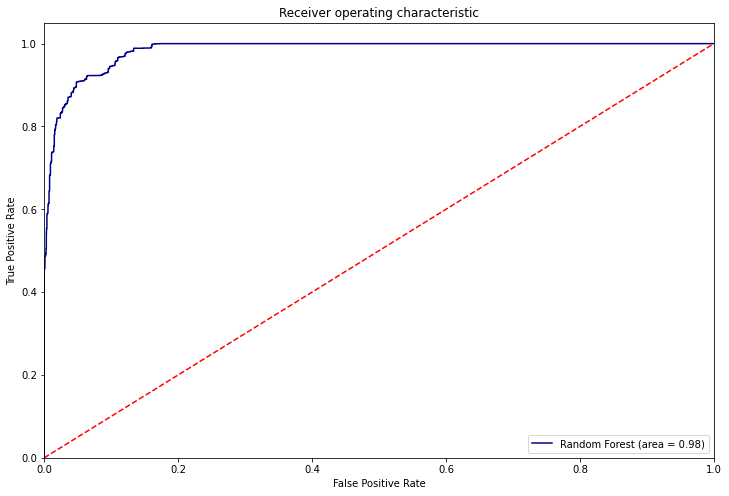

In [162]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#  Curva ROC, del modelo escogido
logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr,  color='darkblue',label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
# plt.color('bl//ue')
plt.show()

In [163]:
# set_option, desactiva la funcion logaritmica
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [164]:
importance_df = pd.DataFrame({'col_name':X.columns, 'importance':clf.feature_importances_})
importance_df.sort_values(by="importance", ascending=False, inplace=True)
importance_df

,col_name,importance
28,MSNM,0.19271
14,Peopledoinghousework(%),0.07243
0,temperature,0.06983
10,Peoplewhocannotreadorwrite(%),0.06902
11,Secondary/HigherEducation(%),0.06105
7,AfrocolombianPopulation(%),0.06002
23,Buildingstratification4(%),0.04330
21,Buildingstratification2(%),0.03680
13,Unemployedpopulation(%),0.03341
19,Householdswithoutinternetaccess(%),0.03152


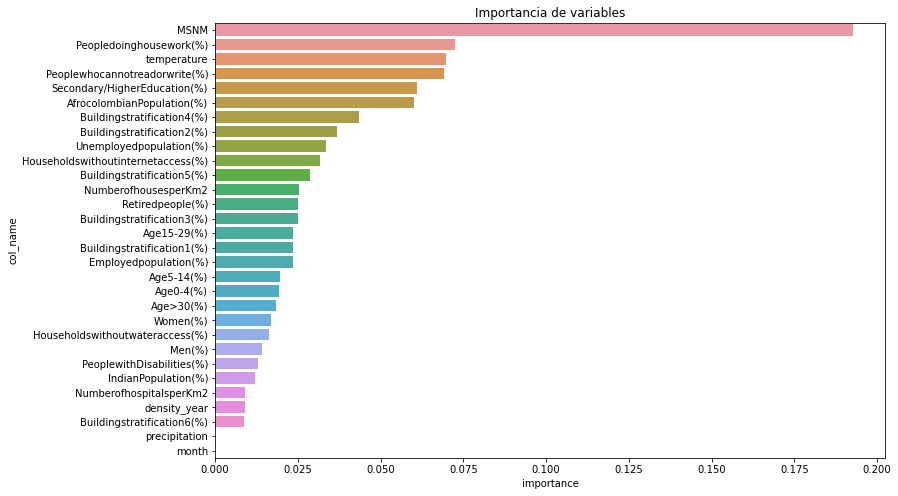

In [165]:
plt.figure(figsize=(12, 8))
sns.barplot(y=importance_df.col_name, x=importance_df.importance)
plt.title("Importancia de variables")
plt.show()